In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random
import os
import math
import seaborn as sns; sns.set()
from pandasql import sqldf
pysql = lambda q: sqldf(q, globals())

import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12


## ETL Section

In [8]:
data = pd.read_csv("who-suicide-statistics/who_suicide_statistics.csv")
data.head(7)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0


In [9]:
print(os.getcwd())

/home/ambiguity/Documents/DataMining


In [10]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [12]:
#Creating Male Column
male = pysql("Select * From data Where sex = 'male'")
male.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,male,15-24 years,NaN,301400.0
1,Albania,1985,male,25-34 years,NaN,264200.0
2,Albania,1985,male,35-54 years,NaN,296700.0
3,Albania,1985,male,5-14 years,NaN,325800.0
4,Albania,1985,male,55-74 years,NaN,132500.0


In [13]:
#Removing all records that have NAN suicide_no
newData = pd.DataFrame(data.dropna(subset=['suicides_no']))



In [14]:
#pd.set_option('display.max_rows', None)
usa =  pysql("select * from data where country = 'United States of America' ")
usa.head()

,country,year,sex,age,suicides_no,population
0,United States of America,1979,female,15-24 years,1001.0,21039000.0
1,United States of America,1979,female,25-34 years,1352.0,18176000.0
2,United States of America,1979,female,35-54 years,2458.0,24669000.0
3,United States of America,1979,female,5-14 years,48.0,17317000.0
4,United States of America,1979,female,55-74 years,1705.0,20097000.0


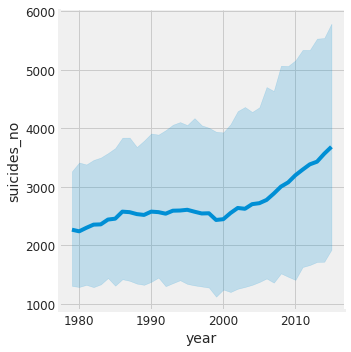

In [15]:
sns.relplot(x='year', y='suicides_no', kind='line', data=usa)

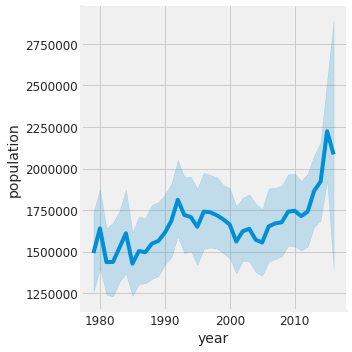

In [16]:
sns.relplot(x='year', y='population', kind='line', data=data)

### Encoding Age range 

In [17]:
#viewing all age categories
ageCat = pysql("Select Distinct age from newData ")
ageCat

,age
0,15-24 years
1,25-34 years
2,35-54 years
3,5-14 years
4,55-74 years
5,75+ years


In [18]:
#converting age column from object data type to categorical
newData['age']=newData['age'].astype('category')
#viewing Data types
newData.dtypes

country          object
year              int64
sex              object
age            category
suicides_no     float64
population      float64
dtype: object

In [19]:
#Converting age category to int64 representation using label encoding
newData['age_cat'] = newData['age'].cat.codes
newData.head(15)

,country,year,sex,age,suicides_no,population,age_cat
24,Albania,1987,female,15-24 years,14.0,289700.0,0
25,Albania,1987,female,25-34 years,4.0,257200.0,1
26,Albania,1987,female,35-54 years,6.0,278800.0,2
27,Albania,1987,female,5-14 years,0.0,311000.0,3
28,Albania,1987,female,55-74 years,0.0,144600.0,4
29,Albania,1987,female,75+ years,1.0,35600.0,5
30,Albania,1987,male,15-24 years,21.0,312900.0,0
31,Albania,1987,male,25-34 years,9.0,274300.0,1
32,Albania,1987,male,35-54 years,16.0,308000.0,2
33,Albania,1987,male,5-14 years,0.0,338200.0,3


### Ignore

In [20]:
pysql("Select Count(age_cat) as Count from newData where sex='male' and country = 'United States of America' and suicides_no > 0.0 and age_cat = 3")

,Count
0,37


In [21]:
test = newData.copy()

In [22]:
test['country']=test['country'].astype('category')
test['country_cat'] = test['country'].cat.codes
test.head()

,country,year,sex,age,suicides_no,population,age_cat,country_cat
24,Albania,1987,female,15-24 years,14.0,289700.0,0,0
25,Albania,1987,female,25-34 years,4.0,257200.0,1,0
26,Albania,1987,female,35-54 years,6.0,278800.0,2,0
27,Albania,1987,female,5-14 years,0.0,311000.0,3,0
28,Albania,1987,female,55-74 years,0.0,144600.0,4,0


In [23]:
pysql("Select count(country_cat) from test where year= 2000 and suicides_no > 0.0 and country_cat= 130")

,count(country_cat)
0,11


### End of Ignore Section

In [24]:
#trying label encoding
test_data = newData

dums = pd.get_dummies(test_data.country)
dums.head(10)

,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Zimbabwe
24,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


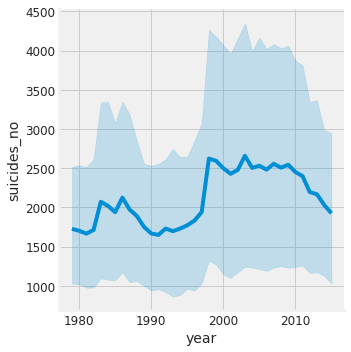

In [25]:
#suicide percentage increase in Japan over period

jpn_rates = pysql("SELECT * FROM test_data WHERE country = 'Japan'")
jpn_rates['suicides_no'].iloc[len(jpn_rates)-1]

present = jpn_rates['suicides_no'].iloc[len(jpn_rates)-1]
past = jpn_rates['suicides_no'].iloc[0]
yrs = jpn_rates['year'].max() - jpn_rates['year'].min()

#rate = ( pow((f/s),(1/y))-1)
diff = round((present/past), 4)
yrs_frac = round((1/yrs), 4)

rate = ((pow(diff, yrs_frac)-1)*100)

#print(round(rate, 1),'%')

sns.relplot(x='year', y='suicides_no', kind='line', data=jpn_rates)

#on average, rates grew 3.1 per year

In [26]:
#differnce between genders

female = pysql("Select suicides_no from test_data WHERE sex = 'female'")
male = pysql("Select suicides_no from test_data WHERE sex = 'male'")

fem_count   = female['suicides_no'].sum()
male_count  = male['suicides_no'].sum()
total_count = test_data['suicides_no'].sum()

male_percentage   = ((male_count/total_count)*100) 
female_percentage = ((fem_count/total_count)*100) 

perc_diff = round((male_percentage - female_percentage), 1)

print('There is a', perc_diff,'% difference betweeen male and female suicides globally')


There is a 52.6 % difference betweeen male and female suicides globally


In [27]:
res = []
genders = ['male', 'female']
for i in range(0, 2):
    for k in range(0, 5):
        amnt = test_data['suicides_no'].loc[ (test_data['sex'] == genders[i]) & (test_data['age']==ageCat['age'][k]) ].sum() 
        res.append([genders[i],ageCat['age'][k], amnt])
res

[['male', '15-24 years', 762550.0],
 ['male', '25-34 years', 1109311.0],
 ['male', '35-54 years', 2286377.0],
 ['male', '5-14 years', 42668.0],
 ['male', '55-74 years', 1429445.0],
 ['female', '15-24 years', 221737.0],
 ['female', '25-34 years', 258022.0],
 ['female', '35-54 years', 609011.0],
 ['female', '5-14 years', 20644.0],
 ['female', '55-74 years', 529023.0]]

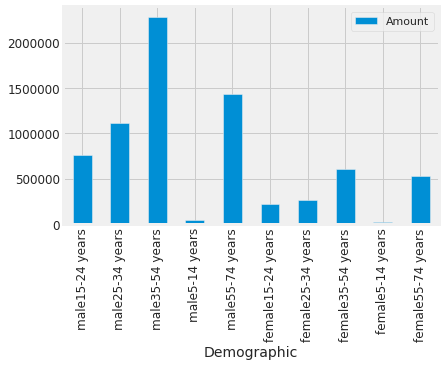

In [28]:
#Which demographic has highest rate of suicide

#distinct age ranges
#ageCat is from above query

genders = ['male', 'female']
max = 0
demo = []
amt = 0

demo_info = []
demo_tot = []


for i in range(0, 2):
    for k in range(0, 5): 
        #select and count all suicides where each of 10 combinations are met
        amnt = test_data['suicides_no'].loc[ (test_data['sex'] == genders[i]) & (test_data['age']==ageCat['age'][k])].sum()
        demo_info.append(genders[i]+''+ageCat['age'][k])
        demo_tot.append(amnt)
        if amnt > max:
            max = amnt
            demo.append(genders[i])
            demo.append(ageCat['age'][k])
            demo.append(amnt)


# dictionary of lists  
dict = {'Demographic': demo_info, 'Amount': demo_tot}

#create dataframe from dict of lists
demo_df = pd.DataFrame(dict)  

#plot bar graph to show results
demo_df.plot.bar(x='Demographic', y='Amount')
plt.show()

#print('The',demo[0], demo[1],' demographic had highest rates of suicides with',demo[2], 'suicides over the period') 

## Time Series Analysis

In [29]:
cnewData = pd.DataFrame(newData.dropna())
cnewData 

,country,year,sex,age,suicides_no,population,age_cat
24,Albania,1987,female,15-24 years,14.0,289700.0,0
25,Albania,1987,female,25-34 years,4.0,257200.0,1
26,Albania,1987,female,35-54 years,6.0,278800.0,2
27,Albania,1987,female,5-14 years,0.0,311000.0,3
28,Albania,1987,female,55-74 years,0.0,144600.0,4
...,...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,1
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,2
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,3
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,4


In [30]:
cnewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 7 columns):
country        36060 non-null object
year           36060 non-null int64
sex            36060 non-null object
age            36060 non-null category
suicides_no    36060 non-null float64
population     36060 non-null float64
age_cat        36060 non-null int8
dtypes: category(1), float64(2), int64(1), int8(1), object(2)
memory usage: 1.7+ MB


In [31]:
#extracting decade 1
d1 = pysql("Select * from cnewData where year <= 1979")
d1.year = pd.to_datetime(d1.year, format='%Y')
d1.set_index('year', inplace=True)

In [32]:
d2 = pysql("Select * from cnewData where year > 1979 and year <= 1989")
d2.year = pd.to_datetime(d2.year, format='%Y')
d2.set_index('year', inplace=True)

In [33]:
d3 = pysql("Select * from cnewData where year > 1989 and year <= 1999")
d3.year = pd.to_datetime(d3.year, format='%Y')
d3.set_index('year', inplace=True)

In [34]:
d4 = pysql("Select * from cnewData where year > 1999 and year <= 2009")
d4.year = pd.to_datetime(d4.year, format='%Y')
d4.set_index('year', inplace=True)

In [35]:
d5 = pysql("Select * from cnewData where year > 2009 and year <= 2019")
d5.year = pd.to_datetime(d5.year, format='%Y')
d5.set_index('year', inplace=True)

### Converting year column to datetime and using it to index the data

In [36]:
cnewData.year = pd.to_datetime(cnewData.year, format='%Y')
cnewData.set_index('year', inplace=True)

In [37]:
cnewData.tail()

,country,sex,age,suicides_no,population,age_cat
year,,,,,,
2015-01-01,Virgin Islands (USA),male,25-34 years,2.0,4609.0,1
2015-01-01,Virgin Islands (USA),male,35-54 years,1.0,12516.0,2
2015-01-01,Virgin Islands (USA),male,5-14 years,0.0,7291.0,3
2015-01-01,Virgin Islands (USA),male,55-74 years,0.0,12615.0,4
2015-01-01,Virgin Islands (USA),male,75+ years,0.0,2496.0,5


### Plot the the graph below to check stationarity Visiblily

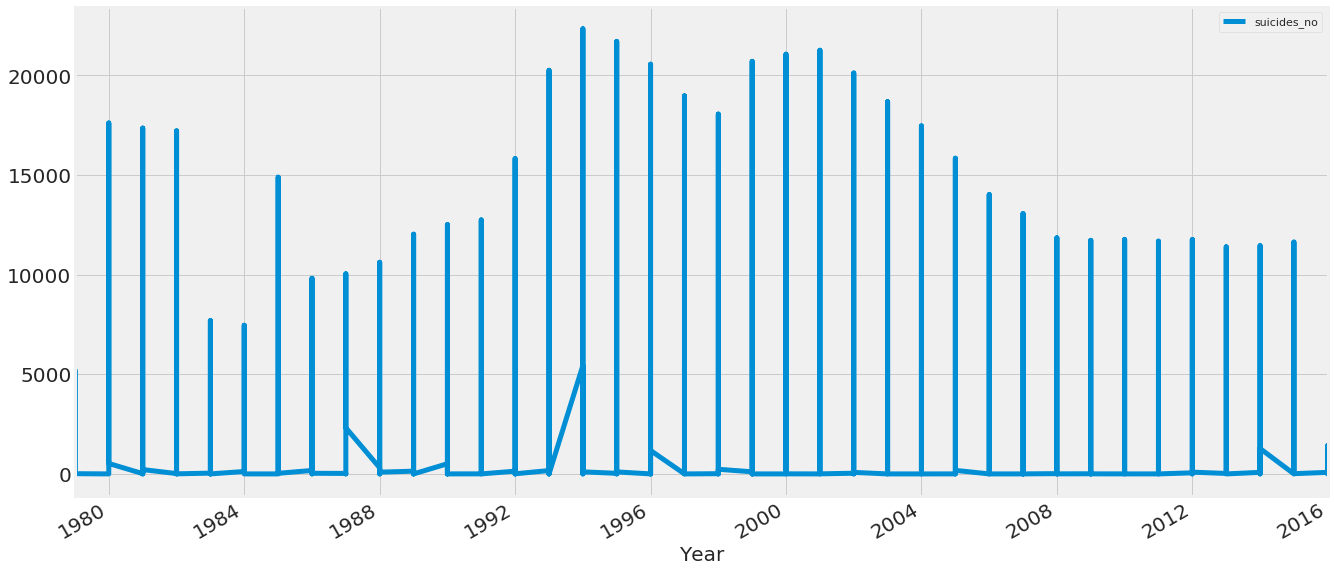

In [38]:
cnewData[['suicides_no']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

#### Resampled data and grouped in terms of decades and summarized/roll up the data

In [39]:
new = pd.DataFrame(cnewData.resample('10A').sum())

new

,suicides_no,population,age_cat
year,,,
1979-12-31,92790.0,8.225891e+08,1080.0
1989-12-31,1697608.0,1.230829e+10,19020.0
1999-12-31,2344775.0,1.641731e+10,23940.0
2009-12-31,2470449.0,1.925506e+10,29160.0
2019-12-31,1392845.0,1.249859e+10,16950.0


### Resampled Overall decades View

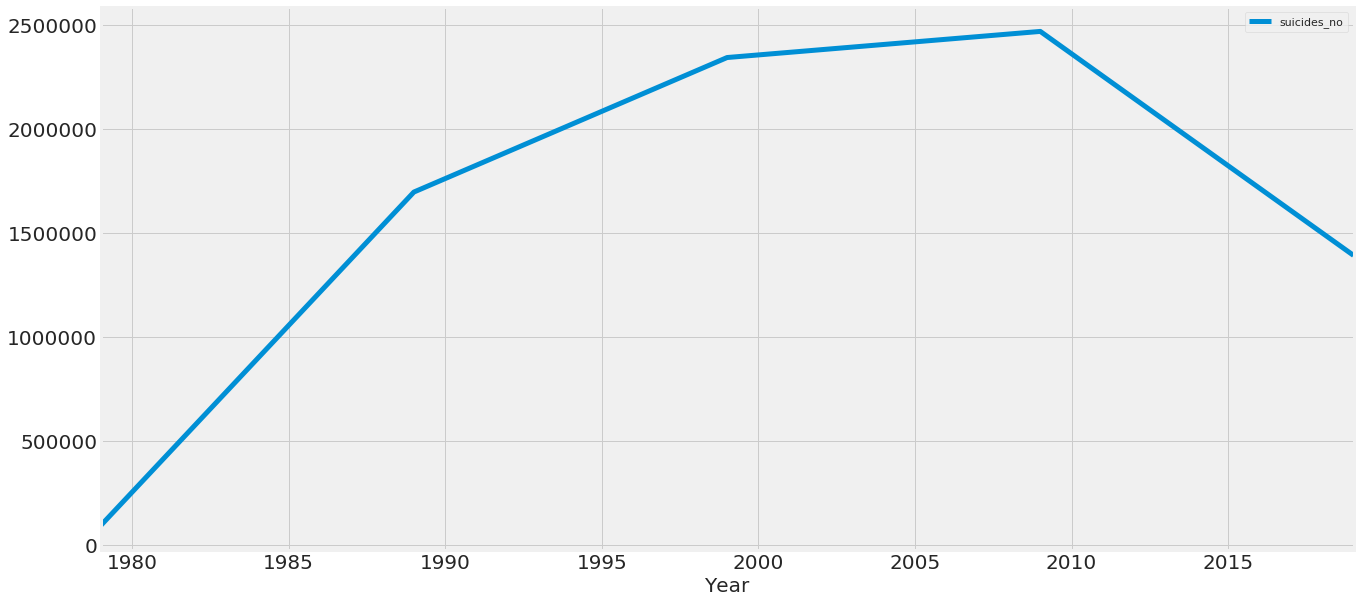

In [40]:
new[['suicides_no']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Suicides for first Decade

/home/ambiguity/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 722450.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


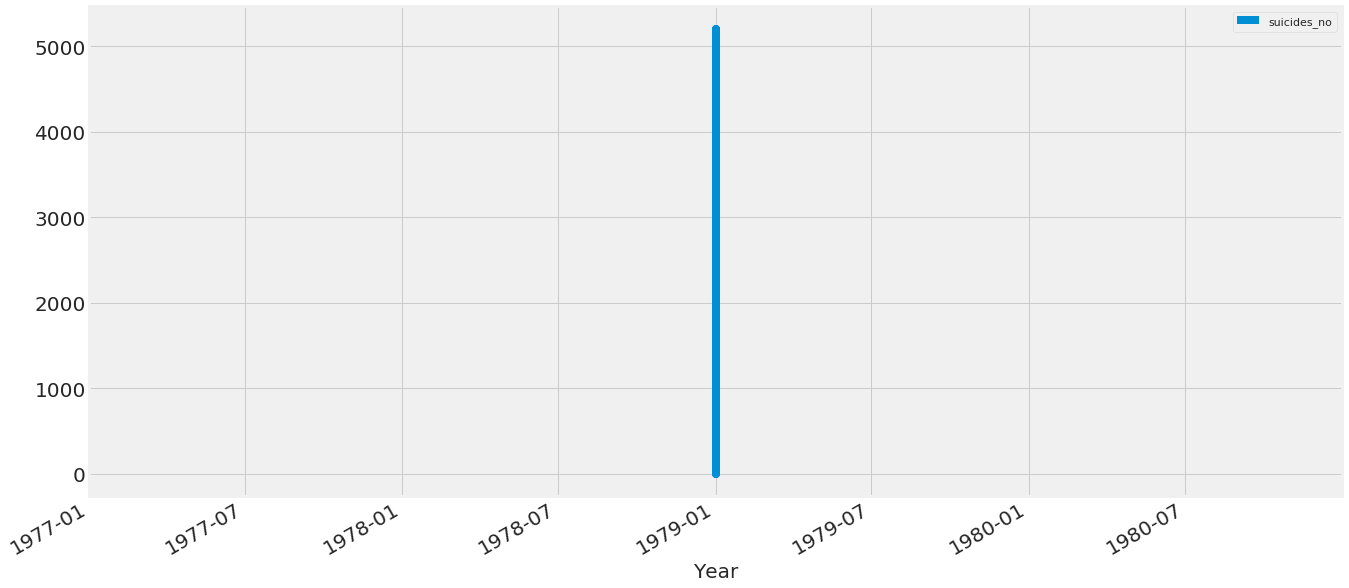

In [41]:

d1[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Suicides for Second Decade 1980 - 1989

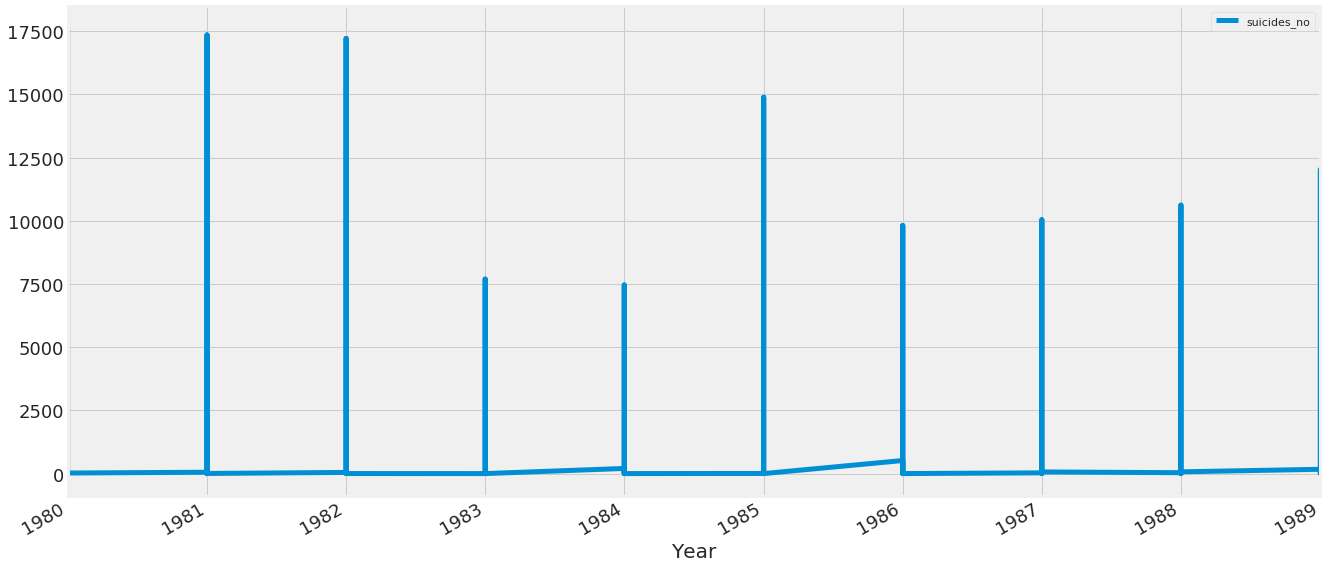

In [42]:
d2[['suicides_no']].plot(figsize=(20,10), linewidth=5, fontsize=18)
plt.xlabel('Year', fontsize=20);

### Suicides for Second Decade 1990 - 1999

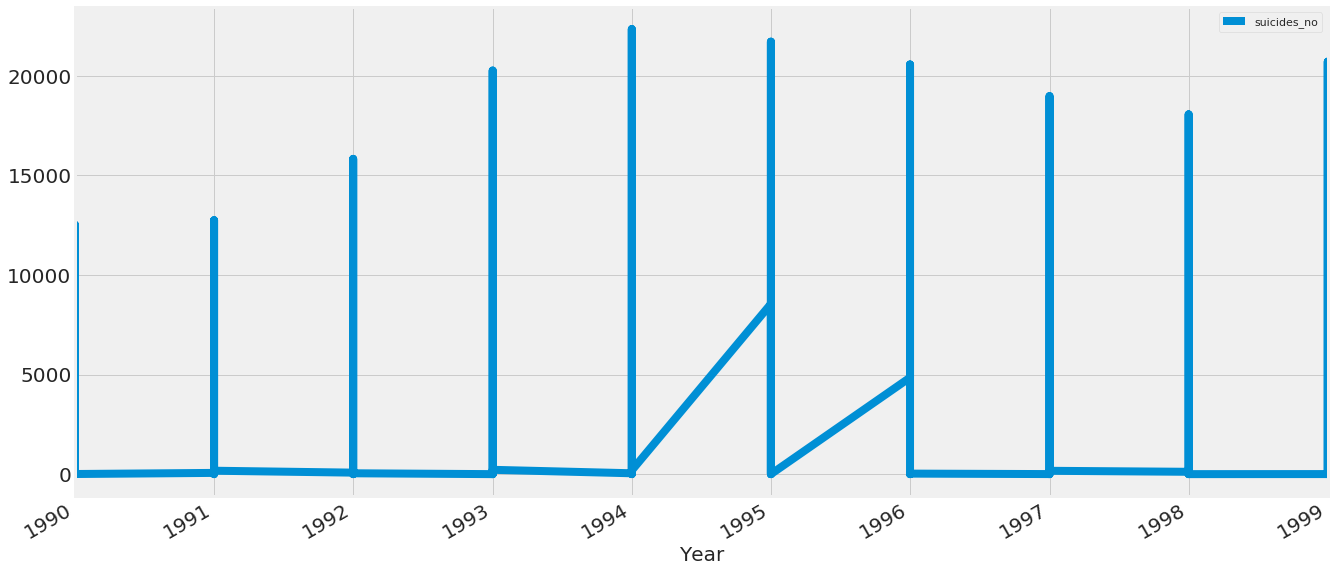

In [43]:
d3[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Suicides for Second Decade 2000 - 2009

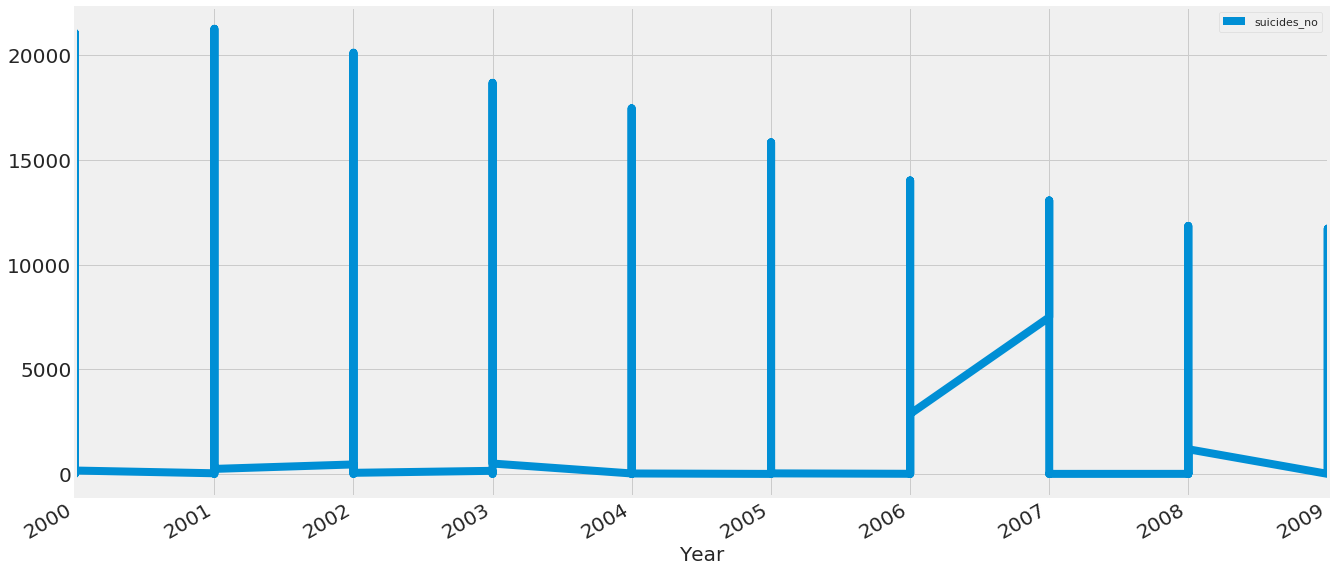

In [44]:
d4[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Suicides for Second Decade 2009- 2019

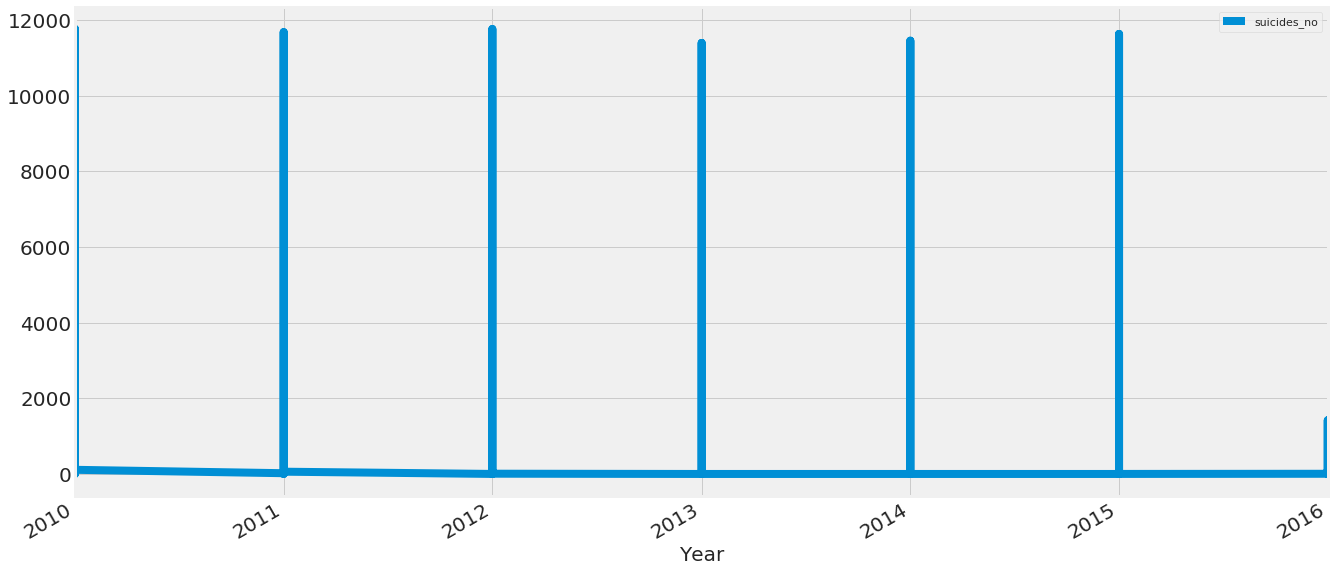

In [45]:
d5[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

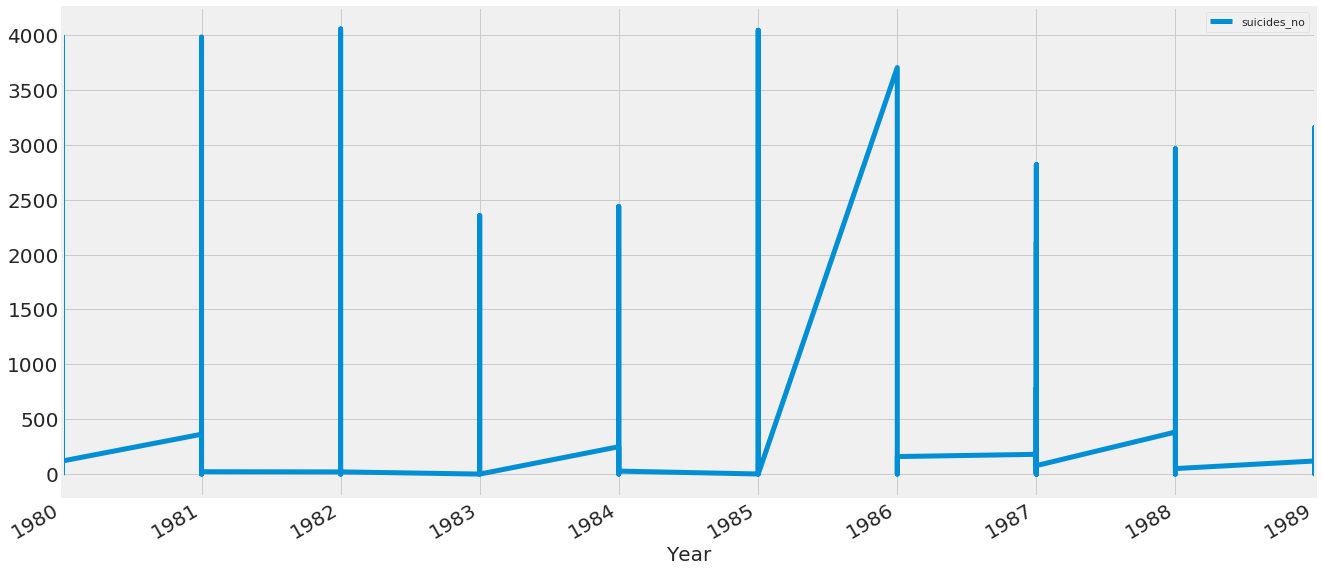

In [46]:
df = d2[['suicides_no']]
df.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Time analysis of Suicides in United States of America

In [47]:
usa = usa.dropna()
#USA Decade 1
usaD1 = pysql("Select * from usa where year <= 1989")
usaD1.year = pd.to_datetime(usaD1.year, format='%Y')
usaD1.set_index('year', inplace=True)

#USA Decade 2
usaD2 = pysql("Select * from usa where year >1989 and year <= 1999")
usaD2.year = pd.to_datetime(usaD2.year, format='%Y')
usaD2.set_index('year', inplace=True)

#USA Decade 3
usaD3 = pysql("Select * from usa where year >1999 and year <= 2009")
usaD3.year = pd.to_datetime(usaD3.year, format='%Y')
usaD3.set_index('year', inplace=True)

#USA Decade 4
usaD4 = pysql("Select * from usa where year >2009 ")
usaD4.year = pd.to_datetime(usaD4.year, format='%Y')
usaD4.set_index('year', inplace=True)

In [48]:
usa.year = pd.to_datetime(usa.year, format='%Y')
usa.set_index('year', inplace=True)

/home/ambiguity/.local/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Plot the the graph below to check stationarity Visiblily

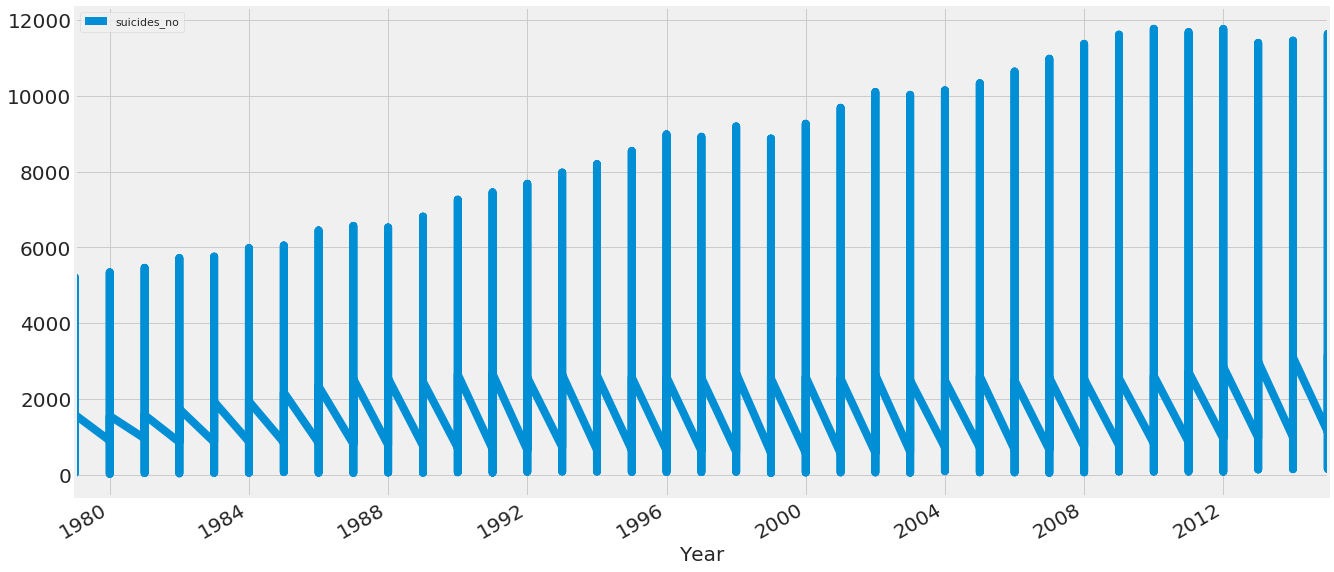

In [49]:
usa[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [50]:
from statsmodels.tsa.stattools import adfuller
ts_log = np.log(newData[['suicides_no']])
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = ts_log.rolling(10).mean()
    rolstd =ts_log.rolling(10).std
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


### Stationarity test

In [51]:
#Had errors here 
#cnewData['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
#test_stationarity(cnewData['suicides_no'])

In [52]:
newUSA = pd.DataFrame(usa.resample('10A').sum())
newUSA

,suicides_no,population
year,,
1979-12-31,27189.0,2.085040e+08
1989-12-31,291926.0,2.198035e+09
1999-12-31,306772.0,2.419909e+09
2009-12-31,328947.0,2.744323e+09
2019-12-31,246567.0,1.764131e+09


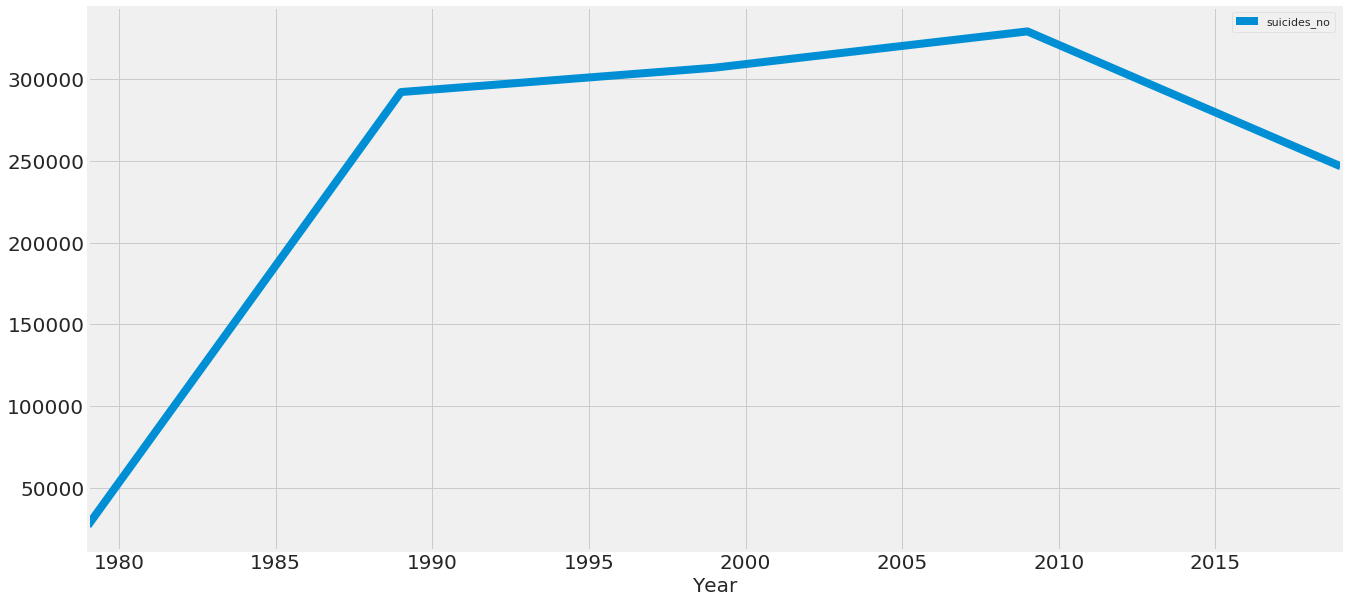

In [53]:
newUSA[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5, 0, 'Year')

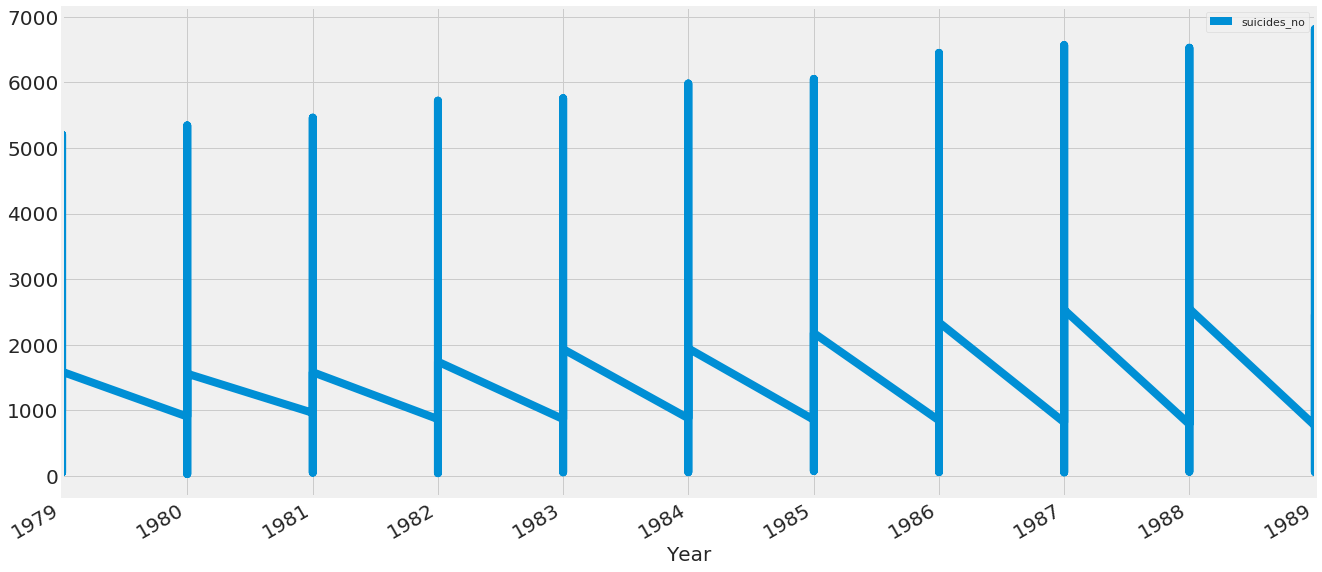

In [54]:
usaD1[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20)

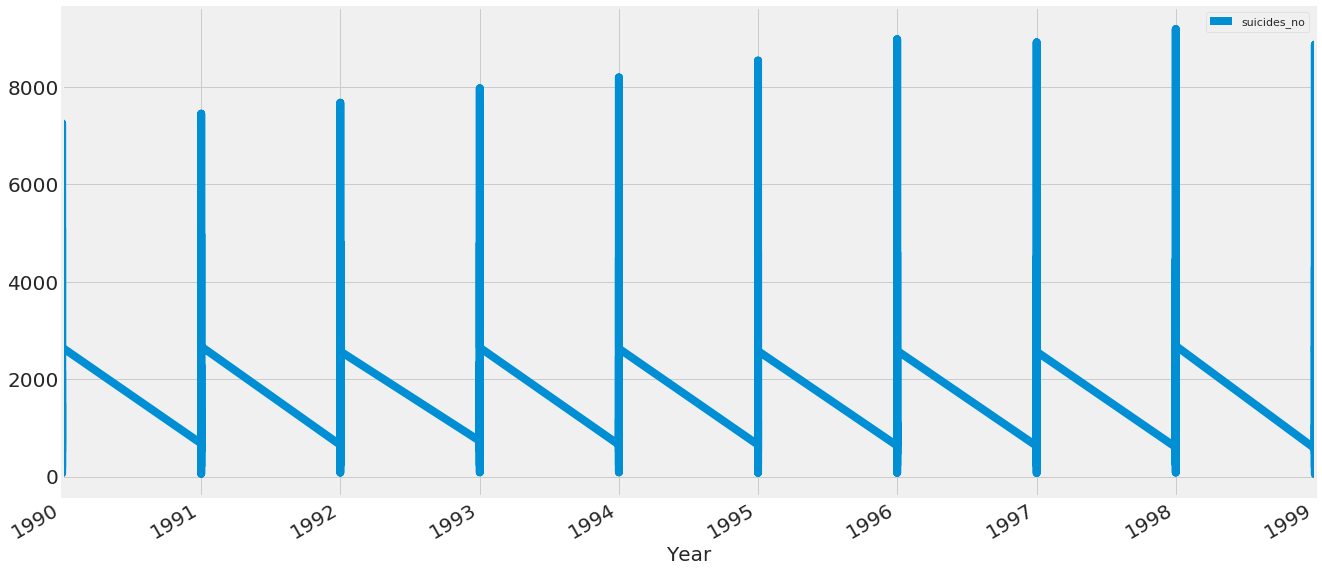

In [55]:
usaD2[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

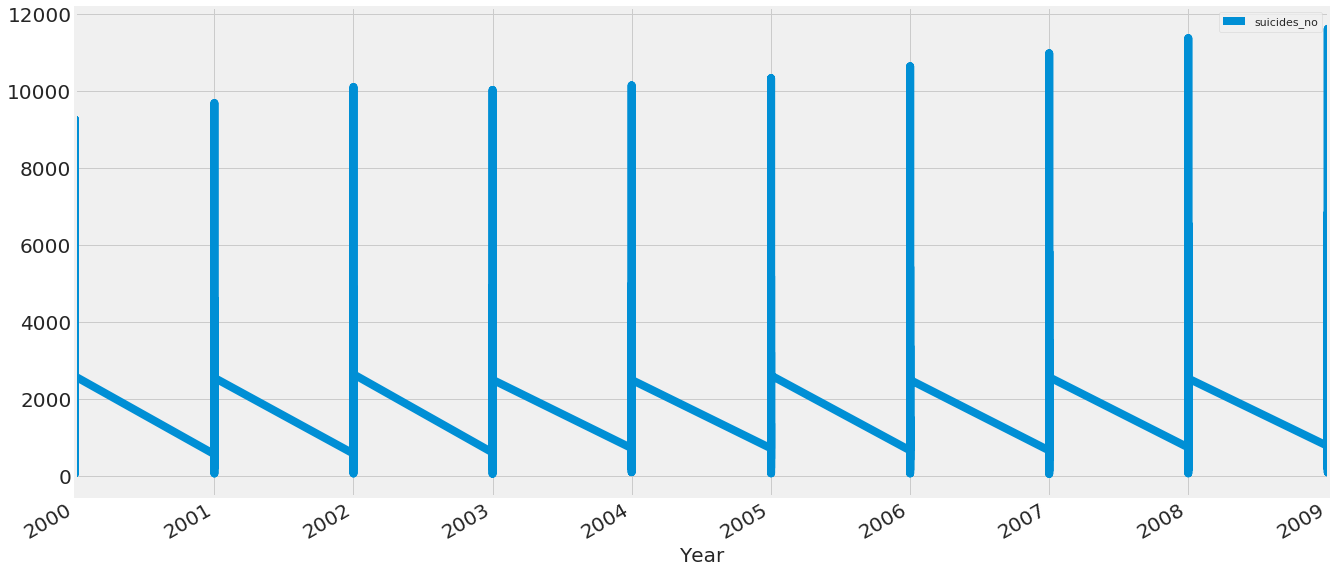

In [56]:
usaD3[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

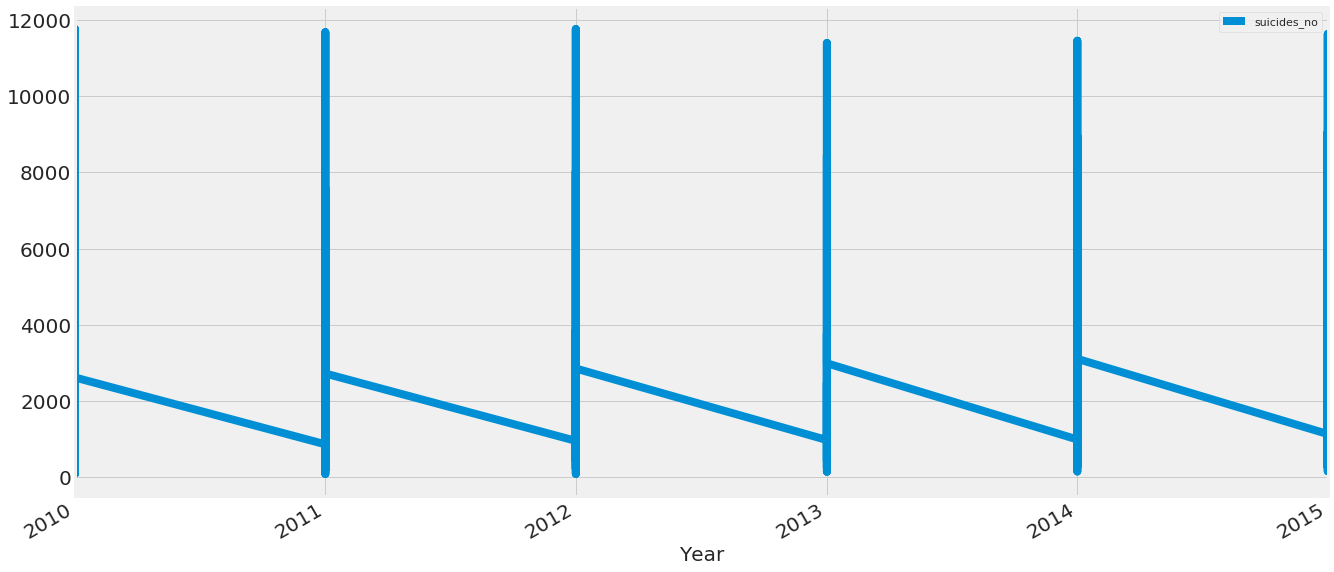

In [57]:
usaD4[['suicides_no']].plot(figsize=(20,10), linewidth=8, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Calculating rolling mean of first decade

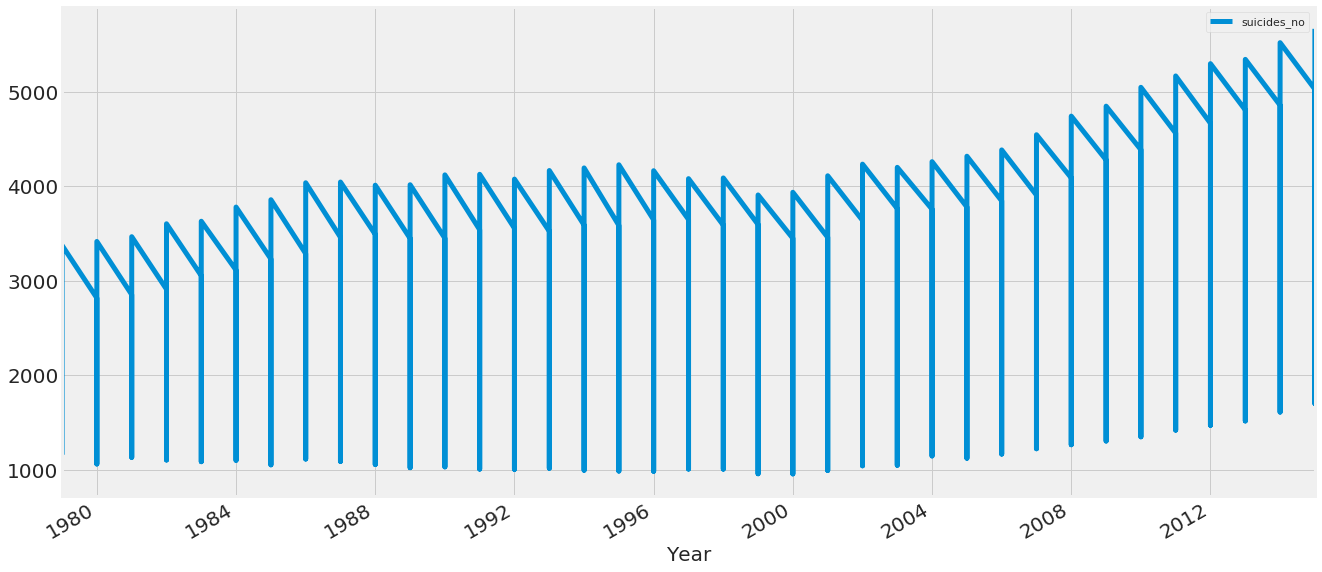

In [58]:
usa[['suicides_no']].rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

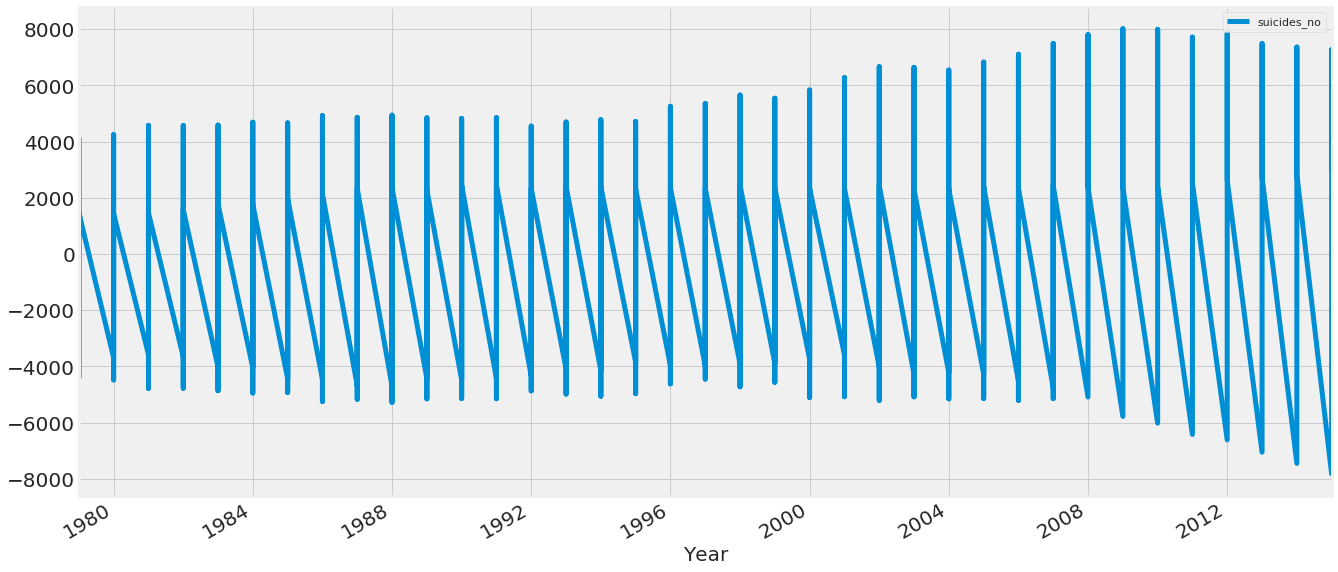

In [59]:
#here were looking at second order differencing .. that is we looking at
#the difference between a unique data point and 2 data points that precede it
usa[['suicides_no']].diff(2).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

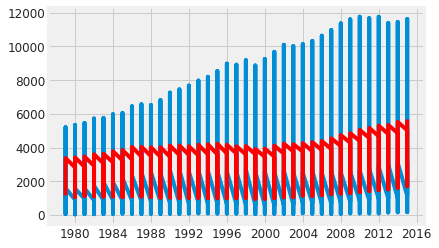

In [60]:
moving_avg = usa[['suicides_no']].rolling(6).mean()
plt.plot(usa[['suicides_no']])
plt.plot(moving_avg, color='red')

In [61]:
# Has Errors 

# import statsmodels.api as sm

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)results = mod.fit()print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

In [62]:
#Has Errors
# from statsmodels.tsa.stattools import acf, pacf

# ts_log_diff = cnewData['suicides_no'] - cnewData['suicides_no'].shift()
# lag_acf = acf(ts_log_diff, nlags=20)
# lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [63]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(usa['suicides_no'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/ambiguity/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ambiguity/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.suicides_no   No. Observations:                  443
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4116.025
Method:                       css-mle   S.D. of innovations           2619.147
Date:                Sun, 24 Nov 2019   AIC                           8246.050
Time:                        17:51:34   BIC                           8274.705
Sample:                             1   HQIC                          8257.351
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3730     46.839      0.200      0.841     -82.430     101.176
ar.L1.D.suicides_no    -0.6903      0.044    -15.786      0.000      -0.776      -0.605
ar.L2.D.suicides

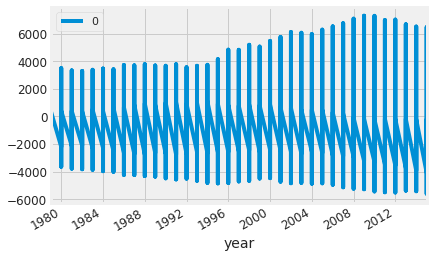

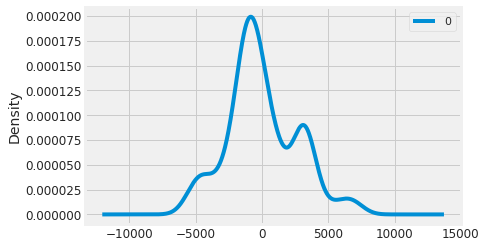

                 0
count   443.000000
mean      0.093692
std    2622.509185
min   -5599.965625
25%   -1444.094428
50%    -339.780316
75%    1613.824264
max    7286.960889


In [64]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [65]:
X = usa['suicides_no'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=1614.157850, expected=414.000000
predicted=781.063838, expected=3381.000000
predicted=1163.520251, expected=4156.000000
predicted=3958.056401, expected=10025.000000
predicted=5479.142647, expected=194.000000
predicted=4498.440942, expected=4941.000000
predicted=2406.723705, expected=2499.000000
predicted=3614.900102, expected=720.000000
predicted=782.063699, expected=932.000000
predicted=4676.280779, expected=3399.000000
predicted=755.246666, expected=98.000000
predicted=2555.890024, expected=1301.000000
predicted=1609.680413, expected=423.000000
predicted=852.997247, expected=3596.000000
predicted=1181.335364, expected=4142.000000
predicted=4140.189214, expected=10145.000000
predicted=5493.425013, expected=187.000000
predicted=4606.217456, expected=4989.000000
predicted=2339.188417, expected=2496.000000
predicted=3689.512122, expected=714.000000
predicted=807.093997, expected=924.000000
predicted=4725.277894, expected=3209.000000
predicted=655.624199, expected=68.000000
pred

NameError: name 'mean_squared_error' is not defined

## K-Means Clustering(Unsupervised Algorithm)

Text(0, 0.5, 'Total_Suicide')

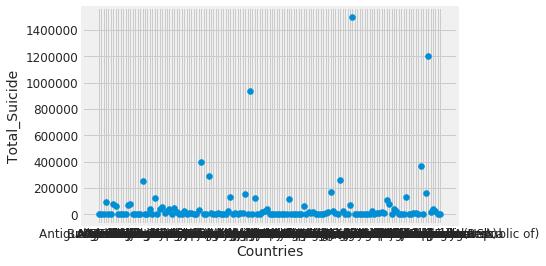

In [66]:
#grouping and summing suicide data for all countries

tData = newData

sums = []
countries = []

country = pysql("SELECT DISTINCT country from newData")

#add each country from dataframe to list
for k in range(0, 141):
    countries.append(country['country'][k])

#get sum of each country
for i in range(0, len(countries)):
    sums.append(tData['suicides_no'].loc[ (tData['country'] == countries[i])].sum())

# dictionary of lists  
dict2 = {'Countries': countries, 'Total_Suicide': sums}

#create dataframe from dict of lists
countries_df = pd.DataFrame(dict2) 


#plot
plt.scatter(countries_df.Countries,countries_df.Total_Suicide)
plt.xlabel('Countries')
plt.ylabel('Total_Suicide')

In [67]:
#OHE of countries
dums = pd.get_dummies(countries_df.Countries)

#merging dataset with dummies
merged=pd.concat([countries_df, dums], axis='columns', sort=True)

merged = merged.drop(['Countries','Zimbabwe'], axis='columns')
merged


,Total_Suicide,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Turkmenistan,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA)
0,1970.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,93862.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2422.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,14647.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
137,44063.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
138,29504.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
139,113.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
from sklearn.cluster import KMeans
x = merged.iloc[:,0:1]

km = KMeans(n_clusters=3)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
y_predicted = km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 1, 0, 0, 0, 0, 0], dtype=int32)

In [71]:
merged['Clusters'] = y_predicted
merged.head(3)

,Total_Suicide,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Clusters
0,1970.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
km.cluster_centers_

array([[  12798.27419355],
       [1213335.66666667],
       [ 199961.57142857]])

In [73]:
#
df1 = merged[merged.Clusters==0]
df2 = merged[merged.Clusters==1]
df3 = merged[merged.Clusters==2]
plt.scatter(merged.Countries,merged['Total_Count'],color='green')
plt.scatter(merged.Countries,merged['Total_Count'],color='red')
plt.scatter(merged.Countries,merged['Total_Count'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Countries')
plt.ylabel('Total_Count')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'Countries'